# Setup

In [1]:
# reddit examples:
# bar graphs: https://www.reddit.com/r/dataisbeautiful/comments/855y7m/11_different_brands_of_aa_batteries_tested_in/#lightbox
# line graph: https://www.reddit.com/r/dataisbeautiful/comments/18h7k9g/how_heterosexual_couples_met_oc/#lightbox
# yearly heatmap: https://www.reddit.com/r/dataisbeautiful/comments/13ro2fw/oc_how_common_in_your_birthday/#lightbox
# scatter plot: https://www.reddit.com/r/dataisbeautiful/comments/kgwl1h/harry_potter_characters_screen_time_vs_mentions/
# 1d comparison: https://www.reddit.com/r/dataisbeautiful/comments/iqplrb/ratings_of_disney_animated_classics_vs_live/

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data

In [4]:
# Kaggle Link: https://www.kaggle.com/datasets/agatii/total-sale-2018-yearly-data-of-grocery-shop/data?select=SELL_1.csv

In [5]:
daily = pd.read_csv('data/Day_sell_24_12_18.csv', delimiter=';')
daily['Date'] = pd.to_datetime(daily.Date, format="%d.%m.%Y")
daily['zn'] = daily['zn'].str.replace(',', '.').astype(float)
daily['sb'] = daily['sb'].str.replace(',', '.').astype(float)
daily['tax'] = daily['tax'].str.replace(',', '.').astype(float)
daily['day_of_week'] = daily.Date.dt.dayofweek
daily['day_of_month'] = daily.Date.dt.day
daily['month'] = daily.Date.dt.month
daily['year'] = daily.Date.dt.year
daily

,Date,zn,sb,tax,marza,day_of_week,day_of_month,month,year
0,2017-12-24,1334.95,1903.82,284.07,"284,8",6.0,24.0,12.0,2017.0
1,2017-12-27,2154.04,2953.43,420.77,"378,62",2.0,27.0,12.0,2017.0
2,2017-12-28,2120.66,2914.02,397.22,"396,14",3.0,28.0,12.0,2017.0
3,2017-12-29,2280.09,3152.23,409.60,"462,54",4.0,29.0,12.0,2017.0
4,2017-12-30,3463.87,4823.36,629.44,"730,05",5.0,30.0,12.0,2017.0
...,...,...,...,...,...,...,...,...,...
357,2018-12-21,2757.31,3961.29,473.52,"730,46",4.0,21.0,12.0,2018.0
358,2018-12-22,4416.64,6426.81,734.23,"1275,94",5.0,22.0,12.0,2018.0
359,2018-12-23,2136.16,3134.60,415.48,"582,96",6.0,23.0,12.0,2018.0
360,2018-12-24,3807.90,5518.87,701.45,"1009,52",0.0,24.0,12.0,2018.0


In [6]:
pd.read_csv('data/ROTATION_of_products01.01.2018-09.01.2019.csv', delimiter=';', encoding='latin1')

,Pgroup,Lp,PKod,Pname,p_sale_in_time,Psale,Pavarage_stock,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,1.0,8478.0,BAMBINO SZAMPON 400 ML,"0,013368984","5,00","0,00",0,NaN
2,,1.0,17048.0,BELLA PODPASKI BLUE MAX,"0,024064171","9,00","0,00",0,NaN
3,,1.0,41.0,BELLA PODPASKI NORMAL 20 B/SKRZYD,"0,136363636","51,00","0,00",0,NaN
4,,1.0,2155.0,BELLA PODPASKI PERF.BLUE 10,"0,06684492","25,00","0,00",0,NaN
...,...,...,...,...,...,...,...,...,...
16329,,1.0,18937.0,ZESTAW PORZECZKOWA 350 ML +FANTA,0,"0,00","0,00",-,-
16330,,1.0,16148.0,"ZESTAW Z ZUBROWKA 0,7 L",0,"0,00","0,00",-,-
16331,,1.0,7453.0,"ZUBROWKA BIA?A 0,2 Z JALOWCEM",0,"0,00","0,00",-,-
16332,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sales = pd.read_csv('data/SELL_1.csv', delimiter=';', encoding='latin1')
for col in sales.columns[4:]:
    sales = sales[sales[col] != ' ']
    sales[col] = sales[col].str.replace(',', '.').astype(float)
sales['Date'] = pd.to_datetime(sales.Date, format="%d.%m.%Y")
sales = sales.sort_values('Date')

In [8]:
sales

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1223,2018-01-01,18661,BEER,PIWO WARKA RADLER 0_5 PUSZKA,8.0,2.33,18.66,3.05,24.40,3.75,30.00,0.03,23.52,0.72,5.74,0.06
1222,2018-01-01,18185,BEER,PIWO WARKA RADLER 0_5 L BUT.,16.0,1.95,31.20,2.51,40.15,3.09,49.45,0.06,22.29,0.56,8.95,0.09
1221,2018-01-01,308,BEER,PIWO WARKA 0_5L BUT.JASNE PE?NE,1.0,1.45,1.45,2.19,2.19,2.69,2.69,0.00,33.79,0.74,0.74,0.01
1220,2018-01-01,314,BEER,PIWO TYSKIE PUSZKA 0_5L,99.0,1.93,191.50,2.67,264.33,3.29,325.71,0.36,27.55,0.74,72.83,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21938,2018-12-01,9014,GENERAL_FOOD,KNORR ZUREK DOMOWY EXPRES 42 G,3.0,1.35,4.05,1.90,5.70,2.05,6.15,0.01,28.95,0.55,1.65,0.01
21937,2018-12-01,10527,COFFEE TEA,KNORR ZUPA GRZYBOWA 50 G,2.0,1.66,3.32,2.30,4.60,2.48,4.96,0.00,27.83,0.64,1.28,0.01
21936,2018-12-01,8513,GENERAL_FOOD,KNORR ZUPA CEBULOWA,1.0,3.36,3.36,4.62,4.62,4.99,4.99,0.01,27.27,1.26,1.26,0.01
21934,2018-12-01,7248,GENERAL,KNORR SOS SALATKOWY OGRODOWY,2.0,1.27,2.54,1.84,3.68,1.99,3.98,0.00,30.98,0.57,1.14,0.01


# Examples

## Example 1: Bar Graph

### reddit example

![bar graph](data/examples/bargraph.jpg)

### data example

In [9]:
sales_by_group = sales.groupby('Pgroup')['Pquantity'].sum().sort_values(ascending=False)
sales_by_group

Pgroup
BREAD                                        70597.861
BEER                                         50711.000
VEGETABLES                                   35542.454
DAIRY_CHESSE                                 35250.483
DRINK_JUICE                                  27911.000
SWEETS                                       23334.420
CIGARETTES                                   22952.000
ICE_CREAMS_FROZEN                            15183.835
GENERAL_FOOD                                 14636.958
VODKA_ALCOHOL                                12902.000
CHEMISTRY                                     9748.900
KETCH_CONCETRATE_MUSTARD_MAJO_HORSERADISH     9007.000
PHONES_ADJUSTMENTS                            5064.000
OCCASIONAL                                    5019.000
CHIPS_FLAKES                                  4005.500
GROATS_RICE_PASTA                             3876.160
CHEWING_GUM_LOLIPOPS                          3762.000
SPICES                                        3496.000
GEN

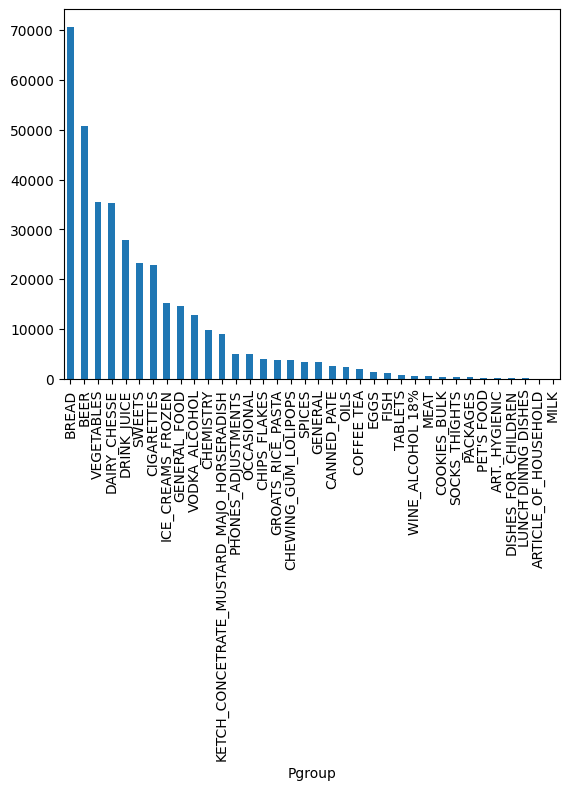

In [10]:
sales_by_group.plot(kind='bar')
plt.show()

In [11]:
images = {
    'SWEETS': 'data/images/candy.jpg',
    'MILK': 'data/images/milk.jpg',
    'CHEMISTRY': 'data/images/chem.jpg',
    'DAIRY_CHESSE': 'data/images/milk.jpg',
    'GENERAL_FOOD': 'data/images/pasta.jpg',
    'DRINK_JUICE': 'data/images/juice.jpg',
    'BREAD': 'data/images/bread.jpg',
    'BEER': 'data/images/beer.jpg',
    'VEGETABLES': 'data/images/veg.jpg',
    }

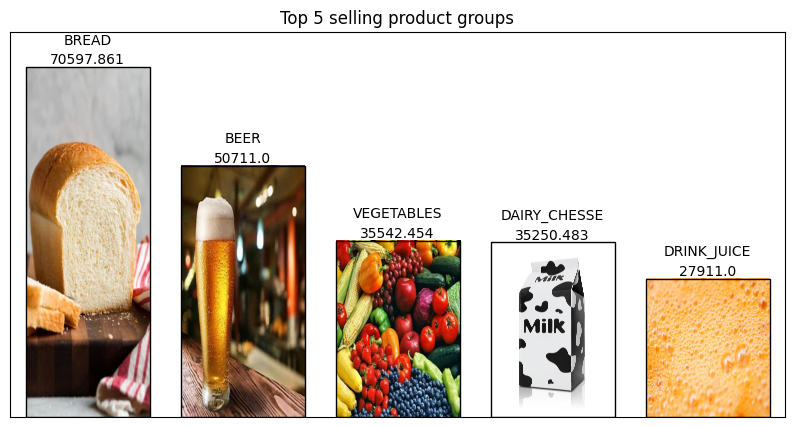

In [12]:
# now make it with the words on the bars
top_n = 5

quantities = sales_by_group

ind = quantities.index[:top_n]
val = quantities.values[:top_n]

fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(ind, val, fill=False)
_s, labels = plt.xticks(rotation=90)
label_texts = [label.get_text() for label in labels]
files = [images[label_text] for label_text in label_texts]
imgs = [mpimg.imread(file) for file in files]


for _ in range(top_n):
    b_h, b_w = bars[_].get_height(), bars[_].get_width()
    b_x, b_y = bars[_].get_x(), bars[_].get_y()  
    left, right = (b_x), (b_x + b_w)
    bottom, top = (b_y), (b_y + b_h)
    ax.imshow(
        imgs[_], 
        extent = [left, right, bottom, top],
        aspect='auto',
        )
    ax.text(b_x + b_w/2, b_h, str(b_h), ha='center', va='bottom')
    ax.text(b_x + b_w/2, b_h+4000, label_texts[_], ha='center', va='bottom')
    
ax.set_xlim(-0.5, top_n-0.5)
ax.set_ylim(0, max(val)*1.1)

plt.yticks([])
plt.xticks([])

plt.title('Top 5 selling product groups')

plt.show()

## Example 2: Line Graph

### Reddit Examples

![line graph](data/examples/linegraph.png)

### Data Example

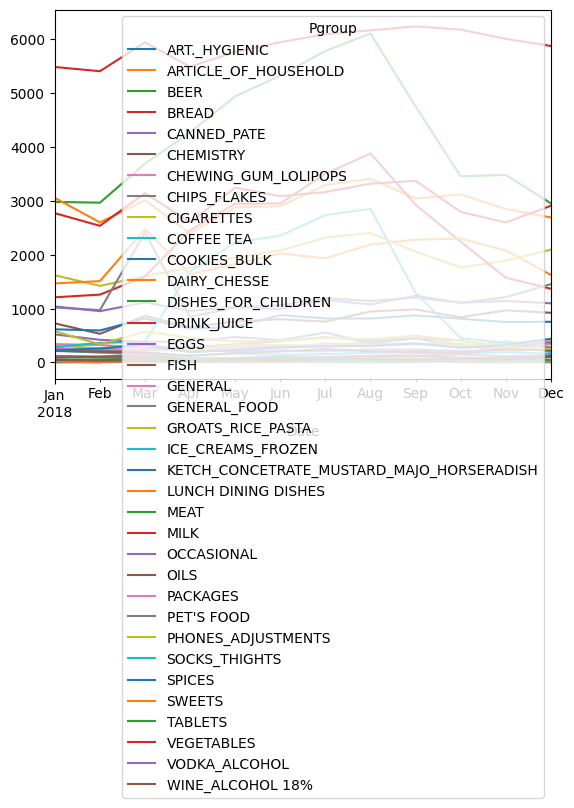

In [13]:
sales.groupby(['Date', 'Pgroup']).Pquantity.sum().unstack().reset_index().set_index('Date').plot()
plt.show()

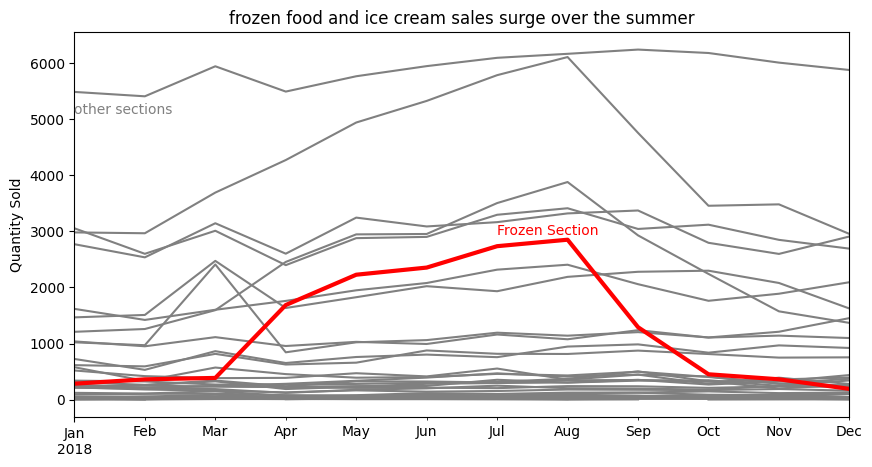

In [14]:
_sales = sales.groupby(['Date', 'Pgroup']).Pquantity.sum().unstack().reset_index().set_index('Date')
products = _sales.columns
fig, ax = plt.subplots(figsize=(10, 5))
for product in products:
    if product == 'ICE_CREAMS_FROZEN':
        pass
    else:
        _sales[product].plot(ax=ax, c='grey', label='')

_sales['ICE_CREAMS_FROZEN'].plot(ax=ax, label='Frozen Section Items', c='r', lw=3)

ax.text('2018-07-01', _sales['ICE_CREAMS_FROZEN']['2018-08-01']+280, 'Frozen Section', ha='left', va='top', color='r')
ax.text('2018-01-01', 5300, 'other sections', ha='left', va='top', color='grey')

plt.title('frozen food and ice cream sales surge over the summer')
plt.xlabel('')
plt.ylabel('Quantity Sold')
plt.show()

## Example 3: Heatmap

### Reddit Example

![Heatmap](data/examples/heatmap.png)

### Data Example

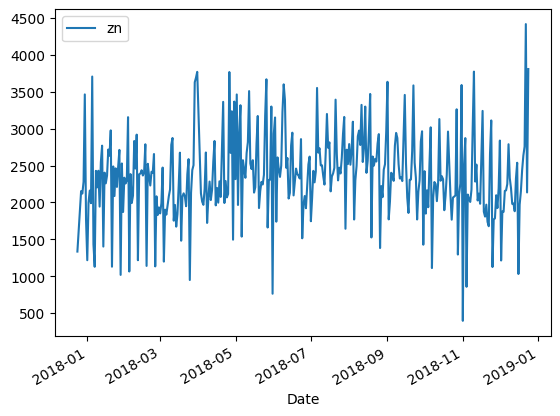

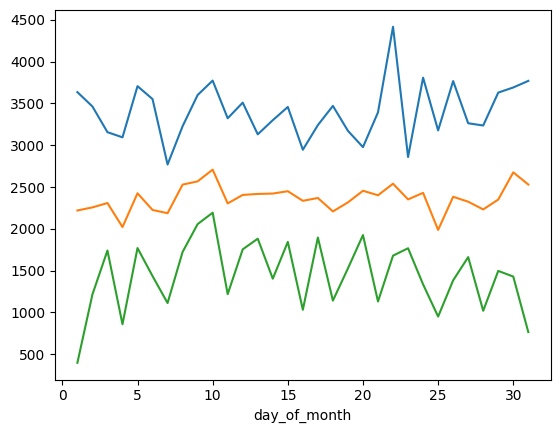

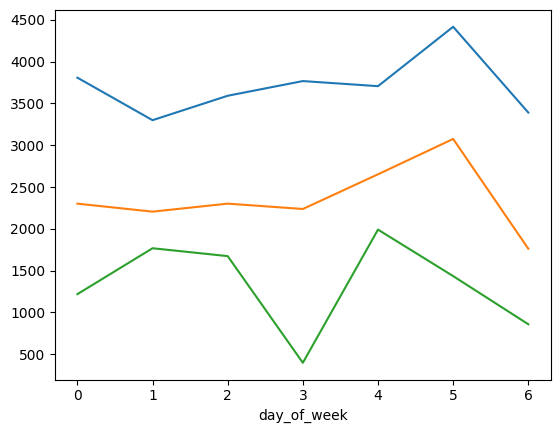

In [15]:
daily.plot(x='Date', y='zn')
plt.show()
daily.groupby('day_of_month').zn.max().plot()
daily.groupby('day_of_month').zn.mean().plot()
daily.groupby('day_of_month').zn.min().plot()
plt.show()
daily.groupby('day_of_week').zn.max().plot()
daily.groupby('day_of_week').zn.mean().plot()
daily.groupby('day_of_week').zn.min().plot()
plt.show()

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

_daily = daily[(daily.month == 10) & (daily.year == 2018)]
_daily = _daily.sort_values('day_of_month')
cal = np.zeros((5, 7))

_day = int(_daily.iloc[0].day_of_week)
_week = 0
for i in range(len(_daily)):
    if _day == 7:
        _day = 0
        _week += 1
    cal[_week, _day] = _daily.iloc[i].sb
    _day += 1

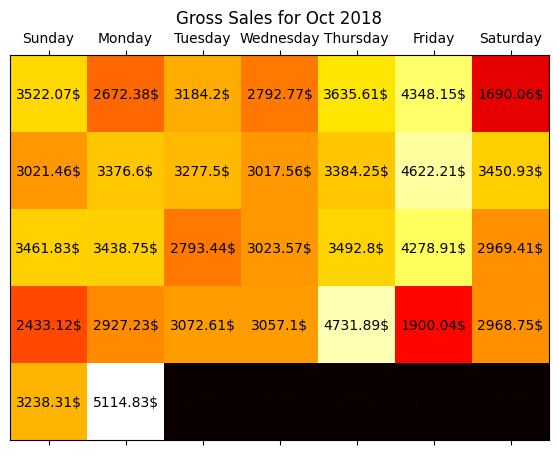

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.matshow(cal, cmap='hot')
for i in range(5):
    for j in range(7):
        ax.text(j, i, str(cal[i, j])+'$', ha='center', va='center')
plt.yticks([])
plt.xticks(
    range(7),
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    )
plt.title(f"Gross Sales for {months[int(_daily.iloc[0].month-1)]} {int(_daily.iloc[0].year)}")
plt.show()

## Example 4: Scatter Plot

### Reddit Example

![scatter plot](data/examples/scatterplot.jpg)

### Data Example

In [18]:
_sales = sales[sales.Pgroup == 'ICE_CREAMS_FROZEN']
_sales = _sales.groupby('Pname')[['Pquantity', 'pce_sn', 'pwa_sb']].sum()
print("=== Ice Cream Sales ===")
print("top 3 selling ice creams by quantity")
top_3_quantity = _sales.sort_values('Pquantity', ascending=False).head(3)
print(top_3_quantity)
print("---")
print("top 3 selling ice creams by price")
top_3_price = _sales.sort_values('pce_sn', ascending=False).head(3)
print(top_3_price)
print("---")
print("top 3 selling ice creams by sales")
top_3_sales = _sales.sort_values('pwa_sb', ascending=False).head(3)
print(top_3_sales)
print("---")

=== Ice Cream Sales ===
top 3 selling ice creams by quantity
                             Pquantity  pce_sn   pwa_sb
Pname                                                  
WODA AQA 1_5 L GAZ              1016.0    9.56  1001.42
LODY PALECZKA LODOWA NORDIS     1003.0    5.10   678.62
WODA AQA 1_5 L N/G               922.0    9.60   912.39
---
top 3 selling ice creams by price
                     Pquantity  pce_sn  pwa_sb
Pname                                         
FILET Z MIRUNY          19.180  267.28  489.23
FILETY Z DORSZ B/S      10.035  243.67  282.84
PALUSZKI RYBNE  LUZ      6.865  171.30  123.38
---
top 3 selling ice creams by sales
                          Pquantity  pce_sn   pwa_sb
Pname                                               
LODY KOKTAJLOWE KUKULKA       825.0   37.29  2573.03
LODY BAJKA W CZEKOLADZIE      560.0   12.35  1216.26
WODA AQA 1_5 L GAZ           1016.0    9.56  1001.42
---


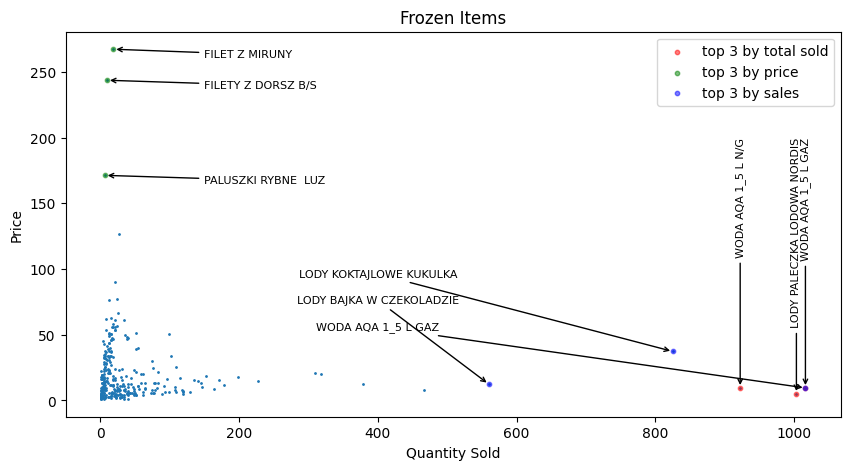

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(
    _sales.Pquantity, 
    _sales.pce_sn,
    s=1
    )

for _, (i, row) in enumerate(top_3_quantity.iterrows()):
    _text = row.name
    ax.annotate(
        _text, 
        (row.Pquantity, row.pce_sn), 
        xytext=(row.Pquantity, 200),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=8,
        ha='center',
        va='top',
        rotation=90,
        )
    ax.scatter(row.Pquantity, row.pce_sn, c='r', s=10, label='top 3 by total sold' if _ == 0 else '', alpha=0.5)

for _, (i, row) in enumerate(top_3_price.iterrows()):
    _text = row.name
    ax.annotate(
        _text, 
        (row.Pquantity, row.pce_sn), 
        xytext=(150, row.pce_sn),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=8,
        ha='left',
        va='top',
        )
    ax.scatter(row.Pquantity, row.pce_sn, c='g', s=10, label='top 3 by price' if _ == 0 else '', alpha=0.5)
    
for _, (i, row) in enumerate(top_3_sales.iterrows()):
    _text = row.name
    ax.annotate(
        _text, 
        (row.Pquantity, row.pce_sn), 
        xytext=(400, 100-(20*_)),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=8,
        ha='center',
        va='top',
        )
    ax.scatter(row.Pquantity, row.pce_sn, c='b', s=10, label='top 3 by sales' if _ == 0 else '', alpha=0.5)

plt.xlabel('Quantity Sold')
plt.ylabel('Price')
plt.title('Frozen Items')
plt.legend()
plt.show()

## Example 5: 1-D Comparison

### Reddit Example

![1D Comparison](data/examples/1dcomparison.jpg)

### Data Example

In [20]:
import seaborn as sns
# seaborn documentation: https://seaborn.pydata.org/index.html

In [21]:
_sales = sales.groupby(['Pname', 'Pgroup'])[['Pquantity', 'pce_sn', 'pwa_sb']].sum()
_sales = _sales.reset_index()
_sales

,Pname,Pgroup,Pquantity,pce_sn,pwa_sb
0,PATYCZKI BELLA 200,CHEMISTRY,16.0,17.99,44.48
1,?ACIATY SEREK 135 G POMIDORY,DAIRY_CHESSE,4.0,5.32,11.16
2,?ACIATY SEKEK SMIETANKOWY 135 G,DAIRY_CHESSE,321.0,31.74,890.46
3,?ACIATY SEREK Z ?OSOSIEM 135 G,DAIRY_CHESSE,10.0,7.94,30.66
4,?ACIATY SEREK Z CEBULA I SZCZ_135G,DAIRY_CHESSE,133.0,32.11,373.07
...,...,...,...,...,...
5156,ZUREK BUTELKA 0_5 L,GENERAL,9.0,7.00,17.13
5157,ZUREK KRAKUS 1 L,GENERAL,4.0,2.89,12.48
5158,ZUREK KRAKUS BUT 300G,GENERAL_FOOD,6.0,15.40,24.96
5159,ZYLETKI POLSILVER STAINLES 2,CHEMISTRY,5.0,3.30,6.75


In [22]:
# calculate the differences between the maximum and minimum pwa_sb for each Pgroup

_sales['pwa_sb_diff'] = _sales.groupby('Pgroup').pwa_sb.transform(lambda x: x.max() - x.min())

In [23]:
order = _sales.groupby('Pgroup')['pwa_sb_diff'].max().sort_values(ascending=False).index

In [24]:
top_10_difs = order[:10]

In [25]:
top_10_difs

Index(['BEER', 'DAIRY_CHESSE', 'BREAD', 'PHONES_ADJUSTMENTS', 'CIGARETTES',
       'VODKA_ALCOHOL', 'VEGETABLES', 'CANNED_PATE',
       'KETCH_CONCETRATE_MUSTARD_MAJO_HORSERADISH', 'DRINK_JUICE'],
      dtype='object', name='Pgroup')

/home/andres/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/andres/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/andres/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/andres/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/andres/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

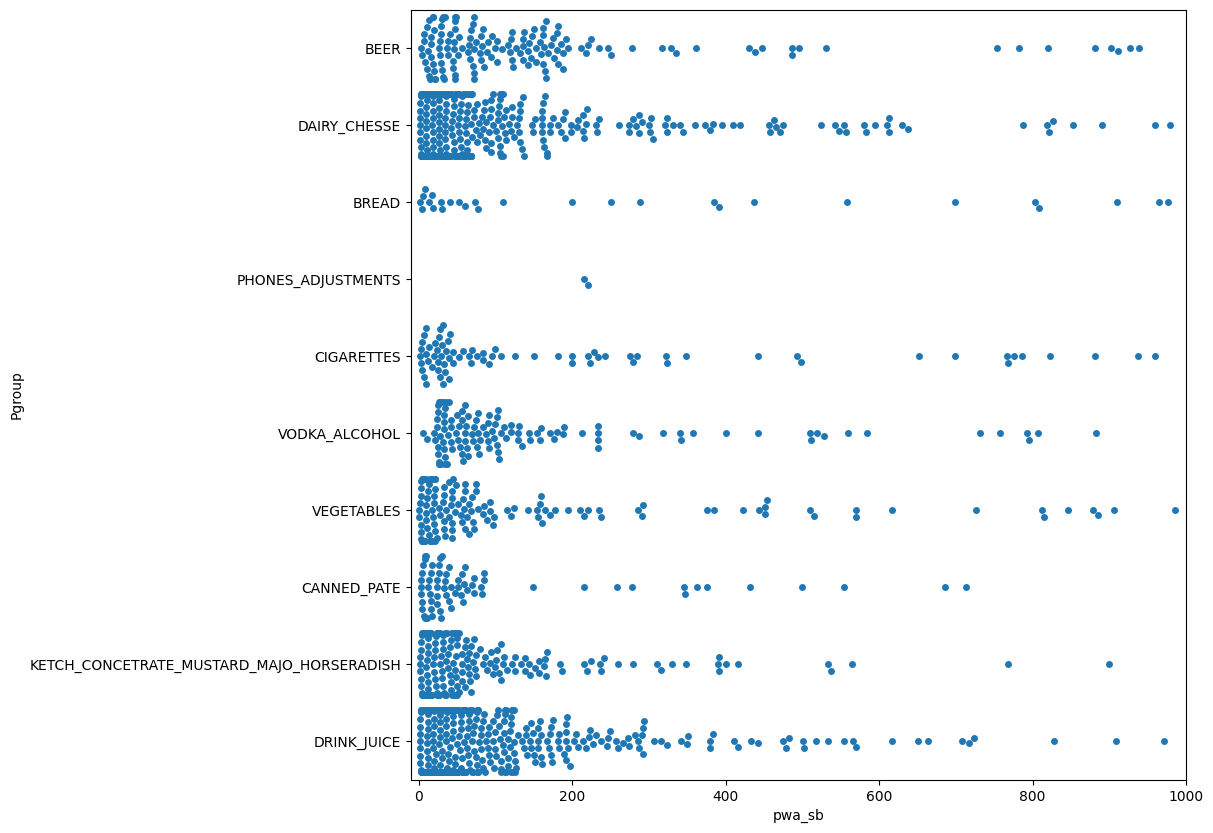

In [26]:
plt.figure(figsize=(10, 10))
sns.swarmplot(
    data=_sales[_sales.Pgroup.isin(top_10_difs)],
    y='Pgroup',
    x='pwa_sb',
    order = top_10_difs
    )
# limit x axis to 0-1000
plt.xlim(-10, 1000)
plt.show()